# Setup and graph creation

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

N = 100 
M = 200  

G = nx.gnm_random_graph(N, M)

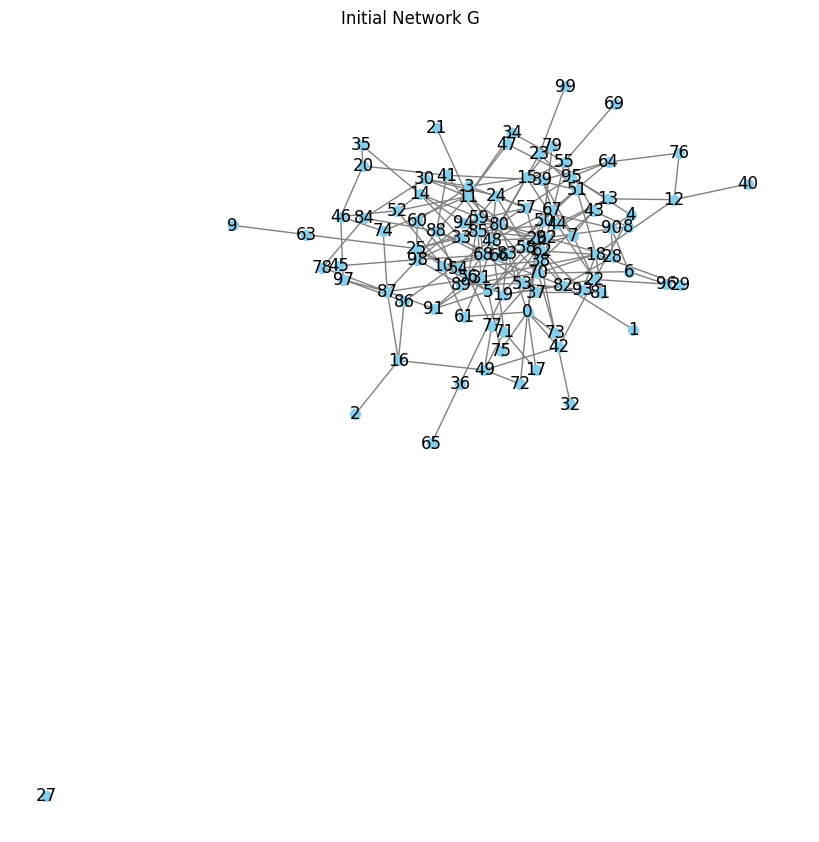

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=50, node_color="skyblue", edge_color="gray")
plt.title("Initial Network G")
plt.show()

In [10]:
p_values = np.linspace(0, 1, 21) 
largest_cluster_sizes = []  

for p in p_values:
    G_p = G.copy()

    edges_to_remove = [(u, v) for u, v in G_p.edges() if np.random.rand() > p]
    G_p.remove_edges_from(edges_to_remove)

    largest_cc = max(nx.connected_components(G_p), key=len)
    largest_cluster_sizes.append(len(largest_cc))


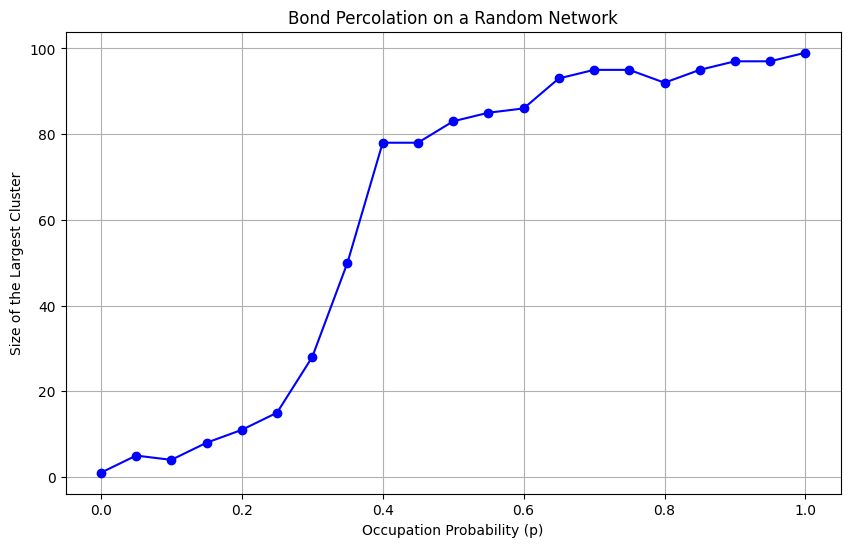

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, largest_cluster_sizes, 'o-', color='blue')
plt.title('Bond Percolation on a Random Network')
plt.xlabel('Occupation Probability (p)')
plt.ylabel('Size of the Largest Cluster')
plt.grid(True)
plt.show()


# Increase resolution

I have imporved the sharpness of the transition: \
increased network size \
averaged over many different clusters

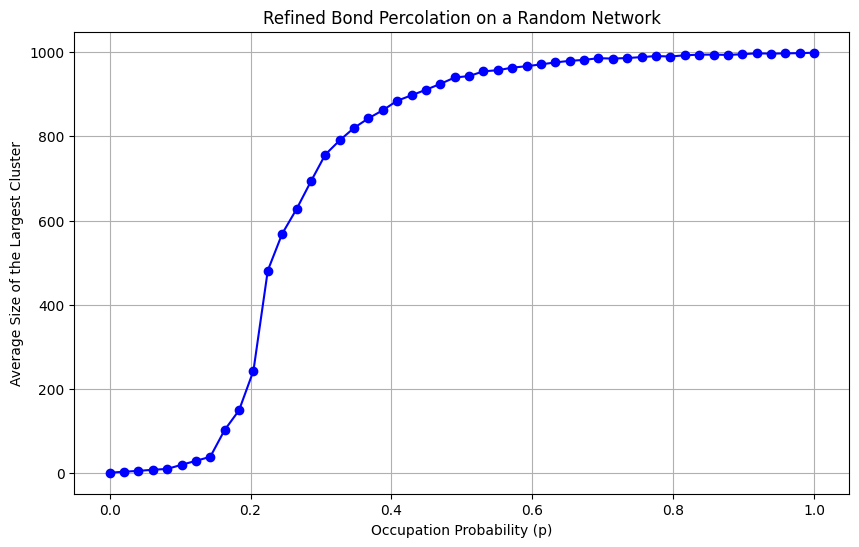

In [12]:
N = 1000 
M = 3000  
p_values = np.linspace(0, 1, 50)  
simulations_per_p = 10 

# Storage for averaged largest cluster sizes
average_largest_cluster_sizes = []

for p in p_values:
    sizes = []  
    for _ in range(simulations_per_p):
        G_p = nx.gnm_random_graph(N, M)
        edges_to_remove = [(u, v) for u, v in G_p.edges() if np.random.rand() > p]
        G_p.remove_edges_from(edges_to_remove)
        if len(G_p) > 0: 
            largest_cc = max(nx.connected_components(G_p), key=len)
            sizes.append(len(largest_cc))
        else:
            sizes.append(0)
    average_largest_cluster_sizes.append(np.mean(sizes))

plt.figure(figsize=(10, 6))
plt.plot(p_values, average_largest_cluster_sizes, 'o-', color='blue')
plt.title('Refined Bond Percolation on a Random Network')
plt.xlabel('Occupation Probability (p)')
plt.ylabel('Average Size of the Largest Cluster')
plt.grid(True)
plt.show()


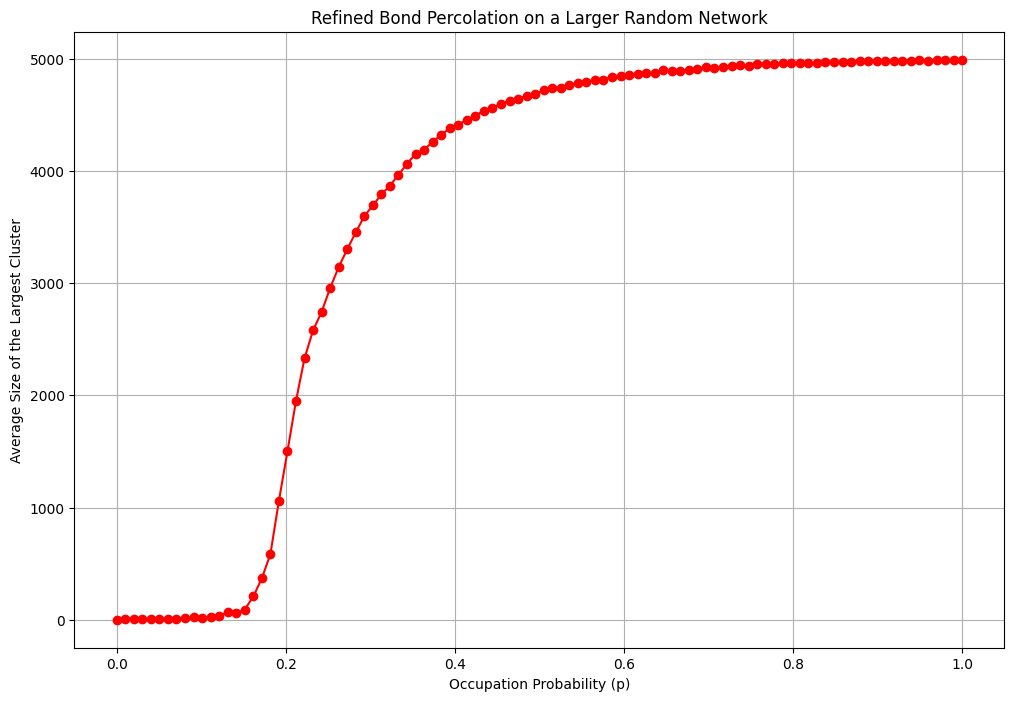

In [13]:
N_large = 5000  
M_large = 15000 
p_values_fine = np.linspace(0, 1, 100) 
simulations_per_p_fine = 5  

average_largest_cluster_sizes_large = []

for p in p_values_fine:
    sizes_large = []  
    for _ in range(simulations_per_p_fine):
        G_p_large = nx.gnm_random_graph(N_large, M_large)
        edges_to_remove_large = [(u, v) for u, v in G_p_large.edges() if np.random.rand() > p]
        G_p_large.remove_edges_from(edges_to_remove_large)
        if len(G_p_large) > 0:  
            largest_cc_large = max(nx.connected_components(G_p_large), key=len)
            sizes_large.append(len(largest_cc_large))
        else:
            sizes_large.append(0)
    average_largest_cluster_sizes_large.append(np.mean(sizes_large))

plt.figure(figsize=(12, 8))
plt.plot(p_values_fine, average_largest_cluster_sizes_large, 'o-', color='red')
plt.title('Refined Bond Percolation on a Larger Random Network')
plt.xlabel('Occupation Probability (p)')
plt.ylabel('Average Size of the Largest Cluster')
plt.grid(True)
plt.show()


## Determine scaling behavior

Edges: 3000: 100%|██████████████████████████████| 50/50 [00:13<00:00,  3.76it/s]


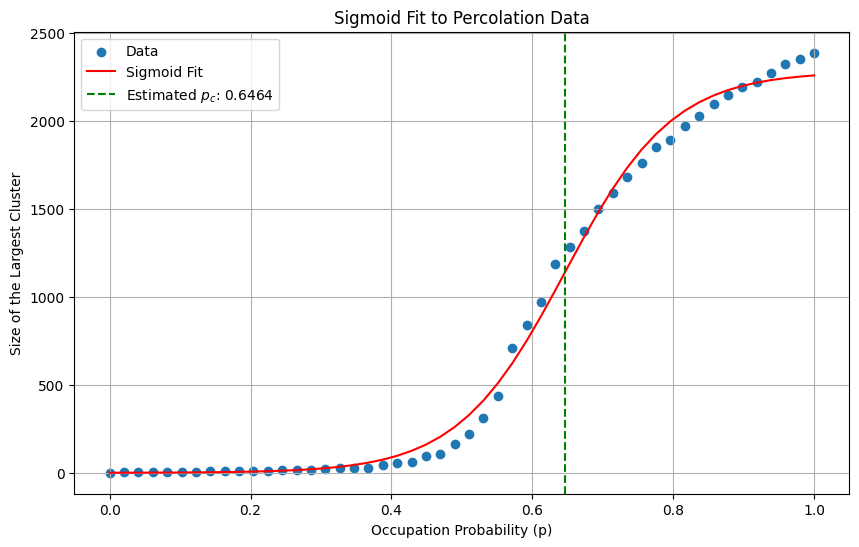

Edges: 4000: 100%|██████████████████████████████| 50/50 [00:15<00:00,  3.28it/s]


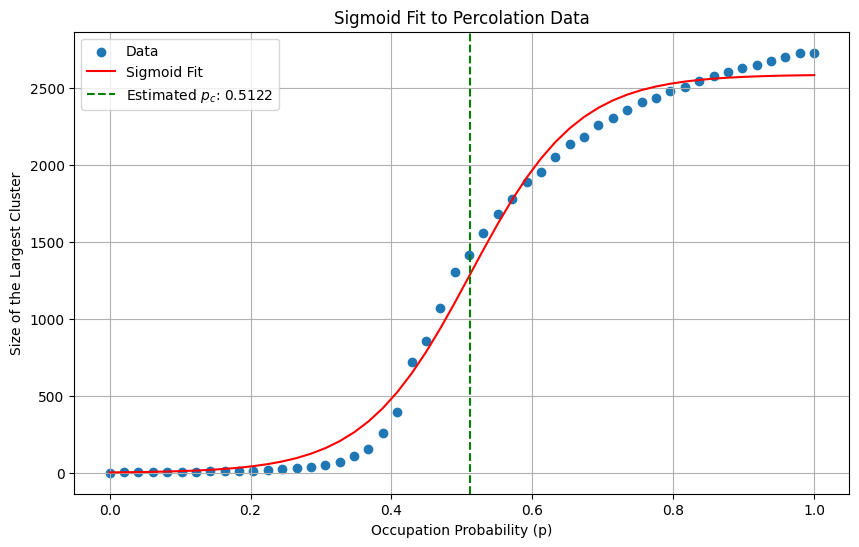

Edges: 5000: 100%|██████████████████████████████| 50/50 [00:17<00:00,  2.83it/s]


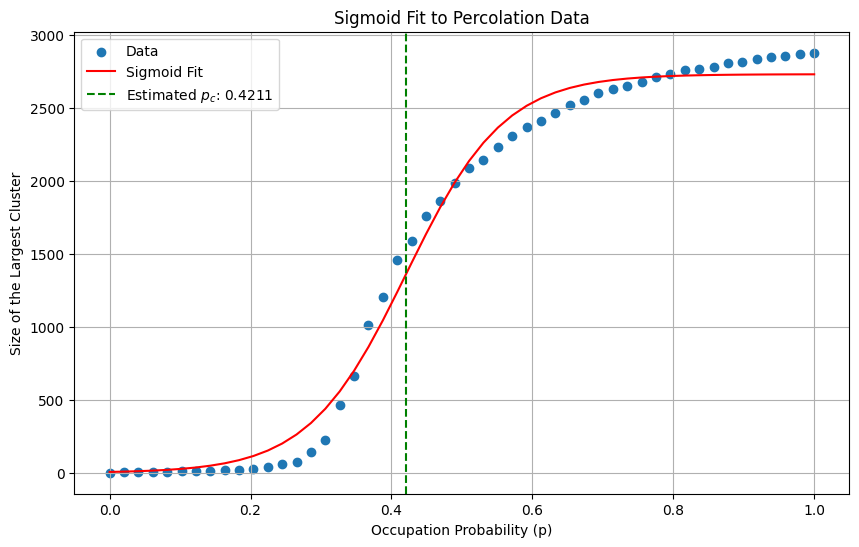

Edges: 6000: 100%|██████████████████████████████| 50/50 [00:19<00:00,  2.57it/s]


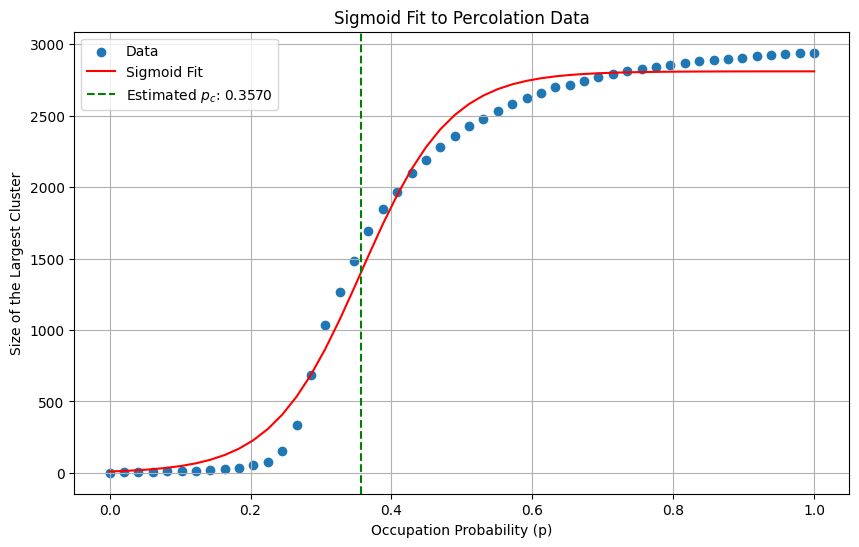

Edges: 7000: 100%|██████████████████████████████| 50/50 [00:21<00:00,  2.30it/s]


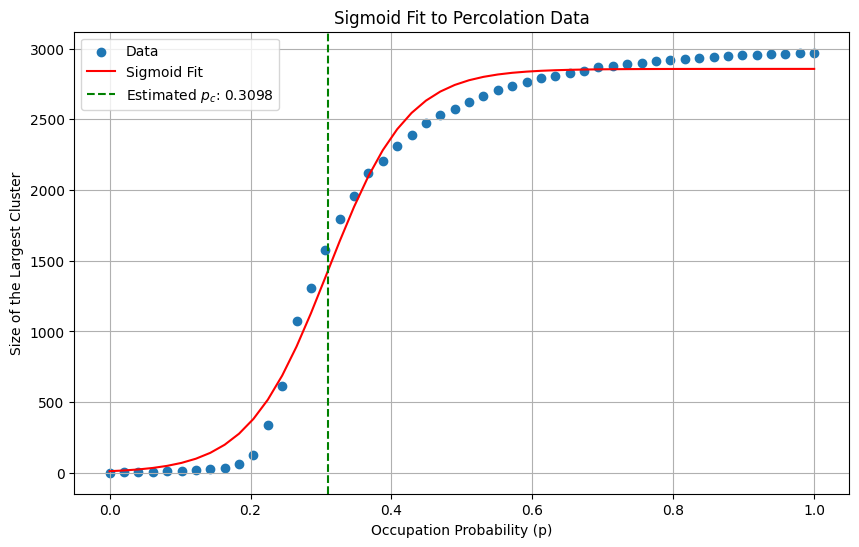

Edges: 8000: 100%|██████████████████████████████| 50/50 [00:23<00:00,  2.16it/s]


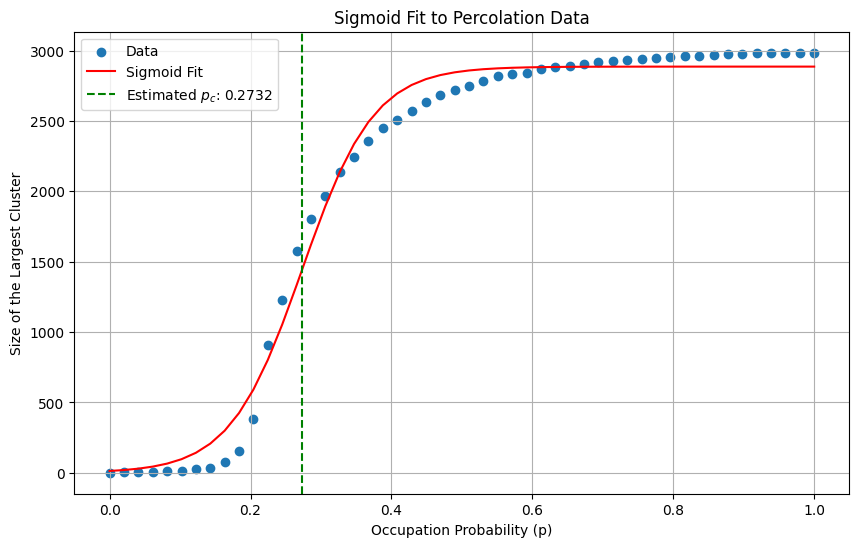

Edges: 9000: 100%|██████████████████████████████| 50/50 [00:24<00:00,  2.03it/s]


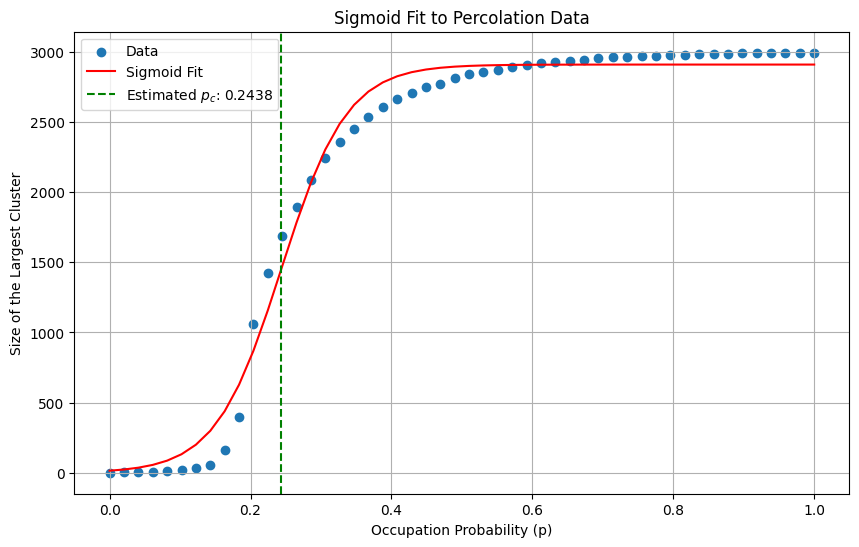

Edges: 10000: 100%|█████████████████████████████| 50/50 [00:26<00:00,  1.89it/s]


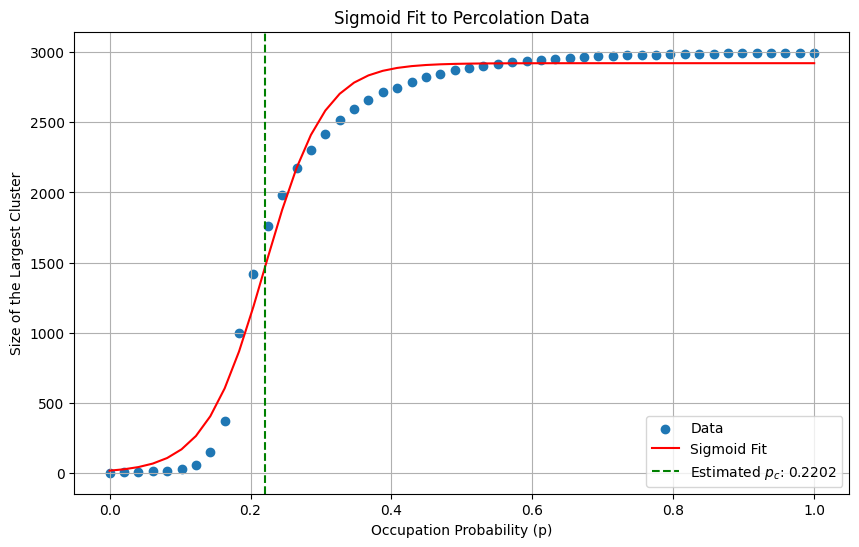

Edges: 11000: 100%|█████████████████████████████| 50/50 [00:28<00:00,  1.74it/s]


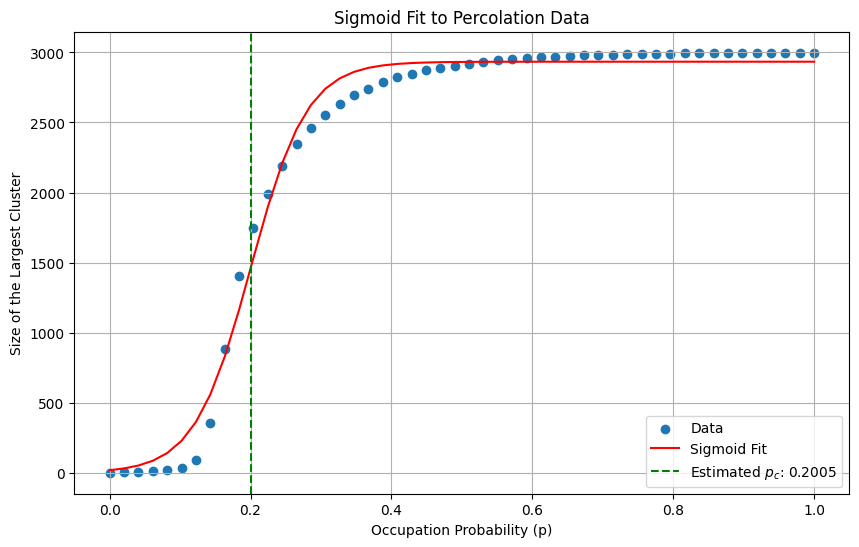

Edges: 12000: 100%|█████████████████████████████| 50/50 [00:30<00:00,  1.62it/s]


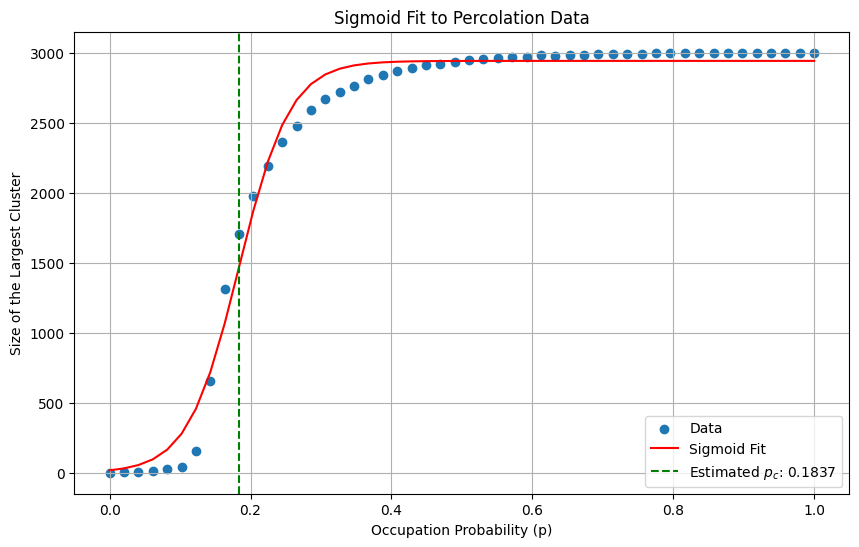

Edges: 13000: 100%|█████████████████████████████| 50/50 [00:33<00:00,  1.48it/s]


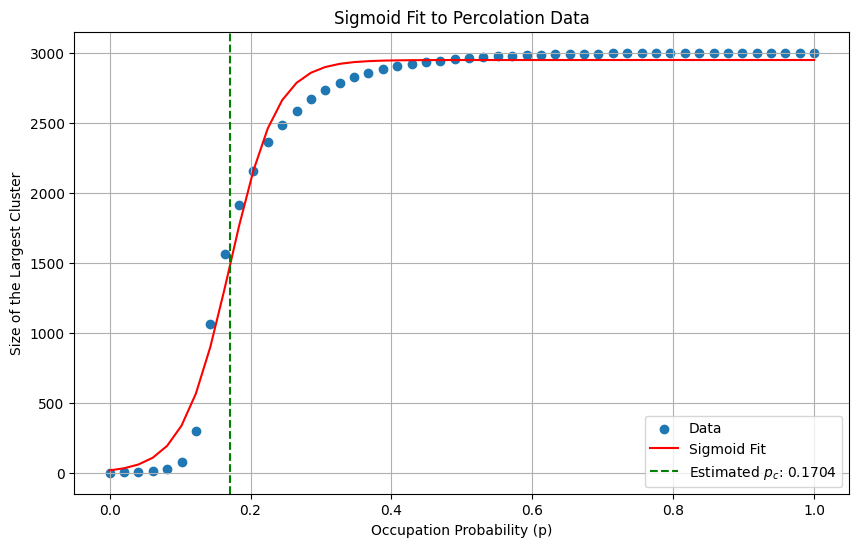

Edges: 14000: 100%|█████████████████████████████| 50/50 [00:37<00:00,  1.34it/s]


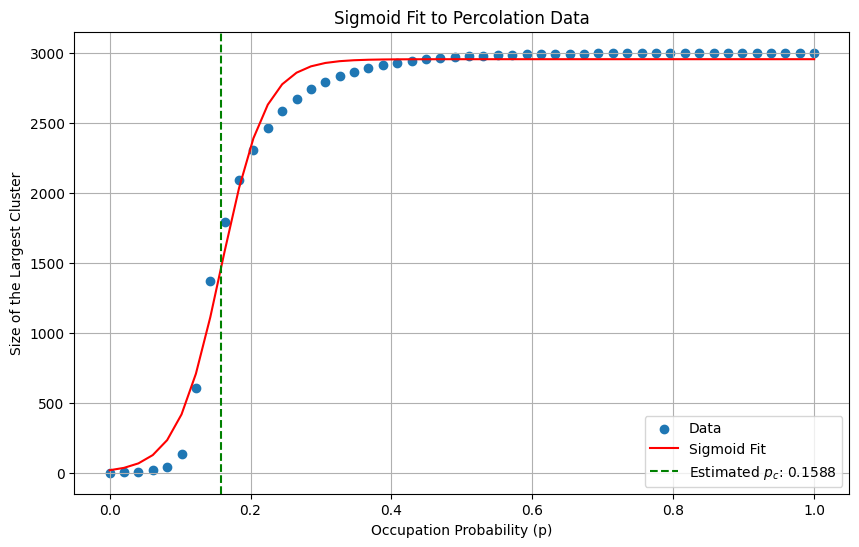

[0.6463979959296241,
 0.5121501147866289,
 0.42113882115311485,
 0.3570102408669825,
 0.3098051677729931,
 0.2731564453847812,
 0.2438130284777515,
 0.22021152399746527,
 0.20046768468726625,
 0.18373294909565796,
 0.1704461406975601,
 0.1587550384144239]

In [14]:
from tqdm import tqdm
from scipy.optimize import curve_fit

N = 3000 
edge_counts = np.arange(3000, 15000, 1000)  
p_values = np.linspace(0, 1, 50) 
simulations_per_p = 20 

p_c_values = []

for M in edge_counts:
    average_largest_cluster_sizes = []

    for p in tqdm(p_values, desc=f"Edges: {M}"):
        sizes = []
        for _ in range(simulations_per_p):
            G_p = nx.gnm_random_graph(N, M)
            edges_to_remove = [(u, v) for u, v in G_p.edges() if np.random.rand() > p]
            G_p.remove_edges_from(edges_to_remove)
            if len(G_p) > 0: 
                largest_cc = max(nx.connected_components(G_p), key=len)
                sizes.append(len(largest_cc))
            else:
                sizes.append(0)
        average_largest_cluster_sizes.append(np.mean(sizes))

    def sigmoid(p, L, k, p_0):
        return L / (1 + np.exp(-k * (p - p_0)))

    L_guess = max(average_largest_cluster_sizes)
    k_guess = 1.0
    p_0_guess = 0.5

    popt, pcov = curve_fit(sigmoid, p_values, average_largest_cluster_sizes, p0=[L_guess, k_guess, p_0_guess])

    L_fit, k_fit, p_0_fit = popt

    p_c_estimate = p_0_fit
    p_c_values.append(p_c_estimate)

    plt.figure(figsize=(10, 6))
    plt.scatter(p_values, average_largest_cluster_sizes, label='Data')
    plt.plot(p_values, sigmoid(p_values, *popt), label='Sigmoid Fit', color='red')
    plt.axvline(x=p_c_estimate, color='green', linestyle='--', label=f'Estimated $p_c$: {p_c_estimate:.4f}')
    plt.xlabel('Occupation Probability (p)')
    plt.ylabel('Size of the Largest Cluster')
    plt.title('Sigmoid Fit to Percolation Data')
    plt.legend()
    plt.grid(True)
    plt.show()
    
p_c_values